In [1]:
import pandas as pd

df=pd.read_csv('../csv/hotel.csv')
df.tail(1)

,Grade,Hotel,Country,Year,Month,stay_day,member,Room type,Date,Review Title,Review Contents,Point
30583,1,골든 파크 호텔 제주 (Golden Park Hotel Jeju),대한민국,2022,12,2,나홀로 여행객,"룸 (싱글베드 2개, 금연)",2022년 12월 | 2박,가성비 좋은 호텔,['전반적으로 깨끗하고 뚜벅이 여행에 최고좋은 시외버스터미널이 걸어서 5분이라 제주...,8.0


In [4]:
# 불용어 (https://www.ranks.nl/stopwords/korean)

korean_stopword='./../stopwords.txt'

with open(korean_stopword, encoding='utf-8') as f:
    stopwords=f.readlines()

stoplist=[x.strip() for x in stopwords]
print(stoplist[:10])

['', '아', '휴', '아이구', '아이쿠', '아이고', '어', '나', '우리', '저희']


In [5]:
# .most_common(40)근거로 불용어 추가


list=['제주도','호텔','숙소','성비','정말','가기','매우','대비','가성','이용','제주','아주','역시','방문','예약','방문','생각','상태','다만','바로','느낌','최고','여행']
for word in list:
    stoplist.append(word)


In [3]:
# 형태소 단위 추출 함수 정의

from konlpy.tag import Okt

def get_pos(x):
    tagger = Okt()
    pos = tagger.pos(x)
    # pos = ['{}/{}'.format(word,tag) for word, tag in pos]
    return pos

# 형태소 추출 동작을 테스트
result = get_pos(df['Review Title'][0])
print(result[:10])

[('기대', 'Noun'), ('보다', 'Josa'), ('좋았어요', 'Adjective')]


In [10]:
# 리뷰 

from konlpy.tag import Okt

for i,row in enumerate(df['Review Contents']):
    row=Okt.normalize(row)

TypeError: normalize() missing 1 required positional argument: 'phrase'

In [12]:
for i,row in enumerate(df['Review Contents']):
    Okt.normalize(row)

TypeError: normalize() missing 1 required positional argument: 'phrase'

In [25]:
# konlpy 키워드 추출(리뷰 타이틀)

from konlpy.tag import Okt
from collections import Counter

nouns_tagger=Okt()
nouns=nouns_tagger.nouns(review_title_corpus)
nouns = [x for x in nouns if x not in stoplist]  # 불용어 제거
count=Counter(nouns)
count

Counter({'기대': 67,
         '수영장': 517,
         '메종': 10,
         '글래드': 8,
         '급': 152,
         '가격': 1691,
         '곳': 555,
         '계절': 2,
         '도심': 22,
         '가족': 654,
         '커플': 114,
         '행시': 22,
         '연말': 5,
         '메종글래드': 4,
         '공항': 456,
         '근처': 232,
         '정말': 384,
         '호캉스': 34,
         '제격': 11,
         '수영': 92,
         '유료': 5,
         '변경': 5,
         '된거': 3,
         '굿굿': 80,
         '추천': 764,
         '임돠': 2,
         '샤워': 18,
         '기': 12,
         '수압': 15,
         '매력': 13,
         '만족': 782,
         '마음': 55,
         '시내': 103,
         '탑': 53,
         '위치': 1469,
         '청결': 143,
         '침대': 86,
         '이불': 8,
         '룸': 229,
         '컨디션': 163,
         '친구': 93,
         '끼리': 30,
         '강': 43,
         '친절': 208,
         '깨끗': 69,
         '요전': 1,
         '객실': 240,
         '롯데': 90,
         '시티': 3,
         '고민': 12,
         '선택': 167,
         '단점': 24,
 

In [26]:
# 한 글자 키워드를 제거 후 20개 추출
remove_char_title = Counter({x : count[x] for x in count if len(x) > 1})
remove_char_title.most_common(5)

[('가격', 1691), ('위치', 1469), ('만족', 782), ('추천', 764), ('시설', 655)]

In [32]:
# konlpy 키워드 추출(리뷰 내용)

from konlpy.tag import Okt
from collections import Counter  # 텍스트 추출, 빈도 수 추출

nouns_tagger=Okt()
nouns=nouns_tagger.nouns(review_corpus)
nouns = [x for x in nouns if x not in stoplist]  # 불용어 제거
count_review=Counter(nouns)

In [28]:
# 한 글자 키워드를 제거 후 20개 추출
remove_char_counter = Counter({x : count_review[x] for x in count if len(x) > 1})
remove_char_counter.most_common(5)

[('직원', 6294), ('가격', 5418), ('위치', 5265), ('시설', 4742), ('조식', 4613)]

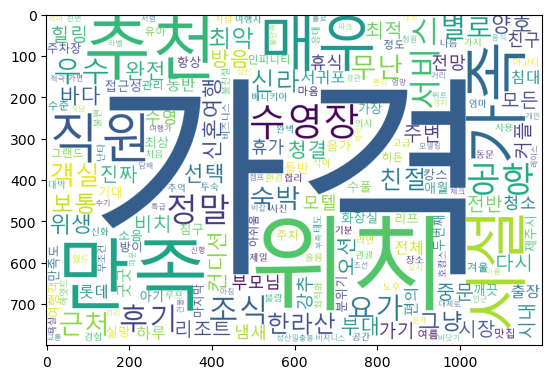

In [29]:
# 타이틀 키워드

from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

wc=WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',width=600, height=400, scale=2.0, max_font_size=250, background_color='white')
gen=wc.generate_from_frequencies(remove_char_title)
plt.figure()
plt.imshow(gen)


In [ ]:
list=['사용','정도','추가','수준','처음','떄문','이동','바닥','대체로','제일','나름','가면','적극','전반','','제주도','호텔','숙소','성비','정말','가기','매우','대비','가성','이용','제주','아주','역시','방문','예약','방문','생각','상태','다만','바로','느낌','최고','여행']


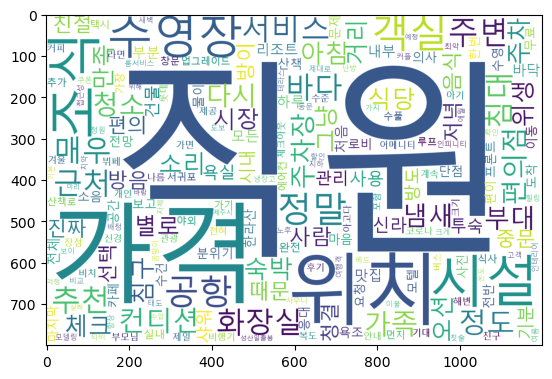

In [33]:
# 리뷰 키워드

wc=WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',width=600, height=400, scale=2.0, max_font_size=250, background_color='white')
gen=wc.generate_from_frequencies(remove_char_counter)
plt.figure()
plt.imshow(gen)


<AxesSubplot: >

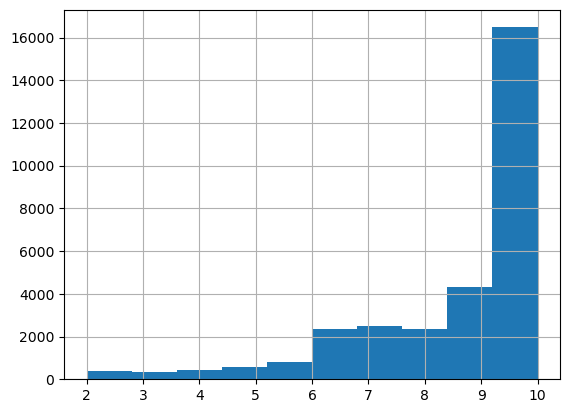

In [35]:
df['Point'].hist()

In [55]:
df[df['Point']==7.2]

,Grade,Hotel,Country,Year,Month,stay_day,member,Room type,Date,Review Title,Review Contents,Point
423,5,메종 글래드 제주 (Maison Glad Jeju),대한민국,2021,11,1,출장 여행객,프리미엄 더블,2021년 11월 | 1박,5성급인데 매력이 없는 호텔,['1박에 17만원정도에 묵은 호텔입니다. 5성급치고 가격은 비싸지않습니다. 실내 ...,7.2
462,5,메종 글래드 제주 (Maison Glad Jeju),대한민국,2022,4,1,유아/아동 동반 가족 여행객,객실정보없음,2022년 4월 | 1박,방음이 정말 심각합니다.,"['방음이 정말 안돼서 위층에서 걸어다니는 소리, 옆방 대화 소리, 복도 소리까지 ...",7.2
469,5,메종 글래드 제주 (Maison Glad Jeju),대한민국,2020,11,2,커플/2인 여행객,주니어 스위트,2020년 11월 | 2박,두번째 가는 매종글래드.,['제가 비행기시간때문에 늦은체크인을 해야해서 전화드렸는데 말 할때마다 말을 끊으시...,7.2
486,5,메종 글래드 제주 (Maison Glad Jeju),대한민국,2020,7,1,유아/아동 동반 가족 여행객,객실정보없음,2020년 7월 | 1박,층간 소음 최악,['숙소의 직원들의 친절도는 괜찮았으나 이상한 윗층을 만나 밤 12시 넘게 시달렸네...,7.2
487,5,메종 글래드 제주 (Maison Glad Jeju),대한민국,2022,2,1,나홀로 여행객,디럭스 더블,2022년 2월 | 1박,5성 호텔로서의 서비스는 아니였다.,"['피트니스센터, 사우나등의 투숙객 우대가 전혀 없었고, 컨시어지 서비스도 엉망이였...",7.2
...,...,...,...,...,...,...,...,...,...,...,...,...
30490,1,리시온 호텔 (Rezion Hotel),대한민국,2018,1,2,나홀로 여행객,슈페리어 (금연),2018년 1월 | 2박,건물 외관은 좋아요,['방은 그냥 모텔정도..? 주차공간이 부족해서 주차가 힘들었습니다.'],7.2
30503,1,리시온 호텔 (Rezion Hotel),대한민국,2017,5,1,커플/2인 여행객,슈페리어 (금연),2017년 5월 | 1박,"가성비, 위치는 좋아요",['올레3코스 걷기 위해 표선면에 숙소를 구하다 보니 후기 등이 좋아 리시온을 예약...,7.2
30519,1,CJ 관광호텔 (CJ Tourist Hotel),대한민국,2019,7,2,출장 여행객,트윈룸,2019년 7월 | 2박,출장,['쏘쏘..'],7.2
30523,1,CJ 관광호텔 (CJ Tourist Hotel),대한민국,2022,3,1,나홀로 여행객,더블룸 - 8py,2022년 3월 | 1박,시외버스 여행시 편리한 위치,['제주시 광양사거리에 위치하여 시외버스를 타고 제주여행을 계획하는 경우 아주 편리...,7.2


In [ ]:
25000, 2500